In [1]:
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2

ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display
from tqdm import trange

In [4]:

# 使用例
table_name = 'HorseResult'  # テーブル名を指定

years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()

dict_statistics={}
for i in trange(len(years)):
  y = years[i]
  filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_{y}.accdb'
  df_summary = k_a_util.read_table(filepath, table_name)
  if(df_summary is not None):
    columns_to_drop = [ 'rr_r_id','rr_r_horse_name','rr_r_horse_id','rr_r_jockey','rr_r_horse_no', 'upd']
    df = df_summary.drop(columns=columns_to_drop)
    dict_statistics[y] = df

 88%|████████▊ | 23/26 [01:35<00:11,  3.72s/it]

Error: テーブル 'HorseResult' はファイル '/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_2023.accdb' に存在しません。
Error: テーブル 'HorseResult' はファイル '/content/drive/MyDrive/Dev/Kjvan/kjdb_prediction_cache_2024.accdb' に存在しません。


100%|██████████| 26/26 [01:35<00:00,  3.69s/it]


In [ ]:
dict_statistics[2000]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_histograms(dict_statistics, rows, cols, dpi=80):
    """
    指定された辞書の各DataFrameのヒストグラムをプロットする関数です。

    Args:
        dict_statistics: プロット対象のDataFrameを含む辞書。
        rows: グラフの行数。
        cols: グラフの列数。
        dpi: グラフの解像度。

    Returns:
        None
    """
    plt.subplots_adjust(wspace=0.4, hspace=1.0)
    for year, df in dict_statistics.items():
        print(f"{year}")
        # グラフのサイズを指定
        fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4, rows*3), dpi=dpi)

        # 各列のヒストグラムをプロット
        for i, column in enumerate(df.columns):
            ax = axes[i // cols, i % cols]
            df[column].hist(ax=ax, bins=20)  # ヒストグラムのビンの数を調整可能
            ax.set_title(column)

        # グラフのレイアウト調整
        #plt.tight_layout()
        plt.suptitle(f"Histograms for Year {year}", fontsize=14)

        # グラフの保存 (必要に応じて)
        # plt.savefig(f"histograms_{year}.png")
        plt.show()



列 'upd_t' は存在しません。
rr_r_race


<Figure size 640x480 with 0 Axes>

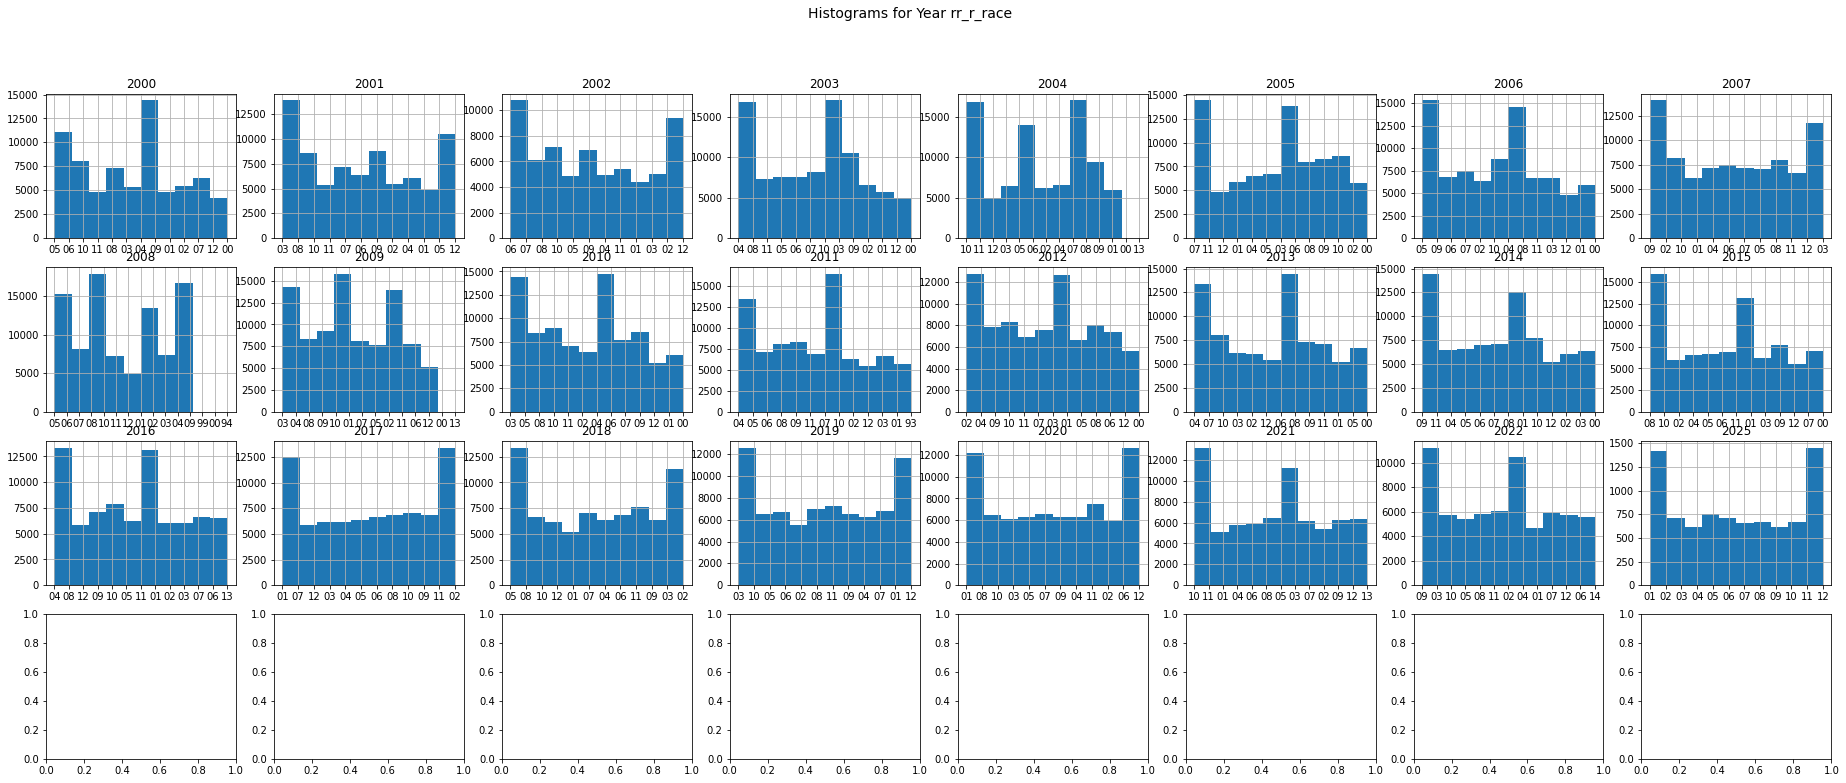

rr_r_rank


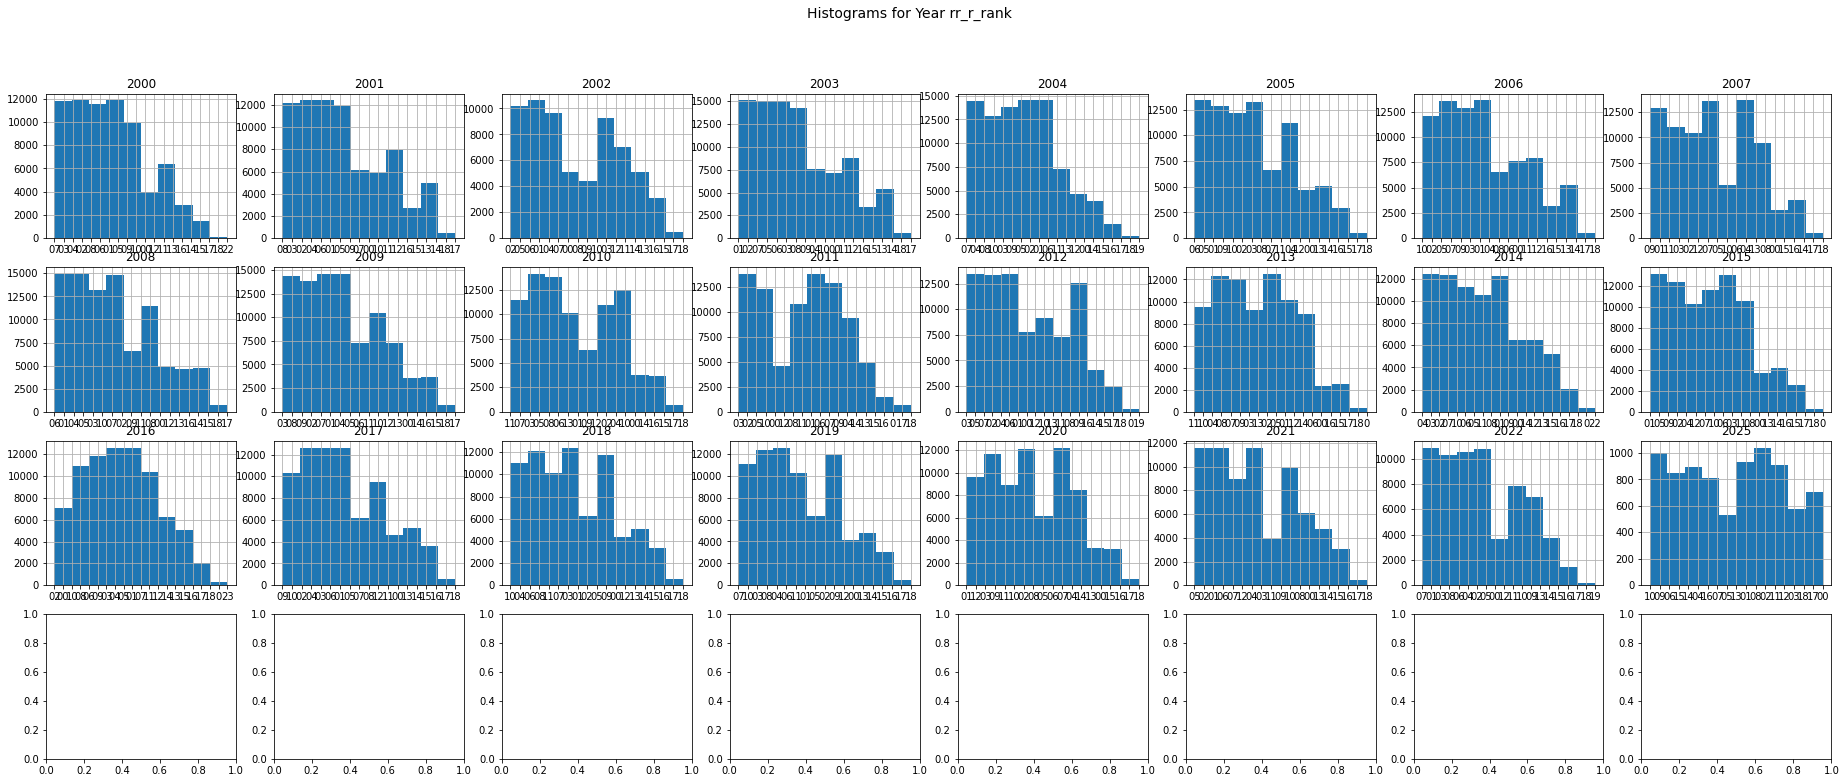

rr_r_waku


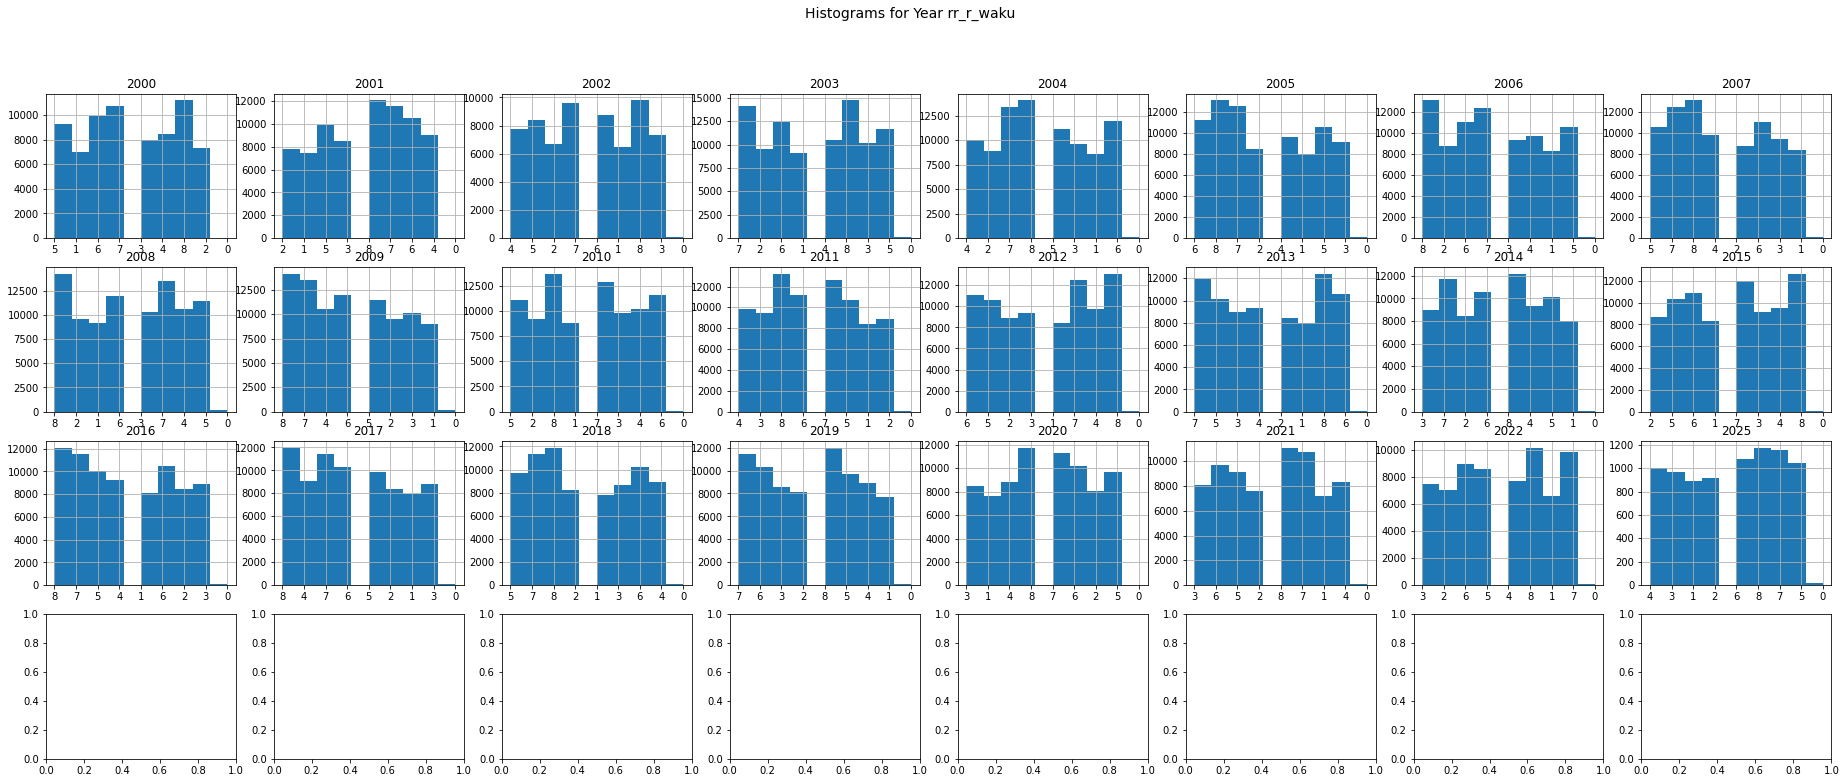

rr_r_blinker


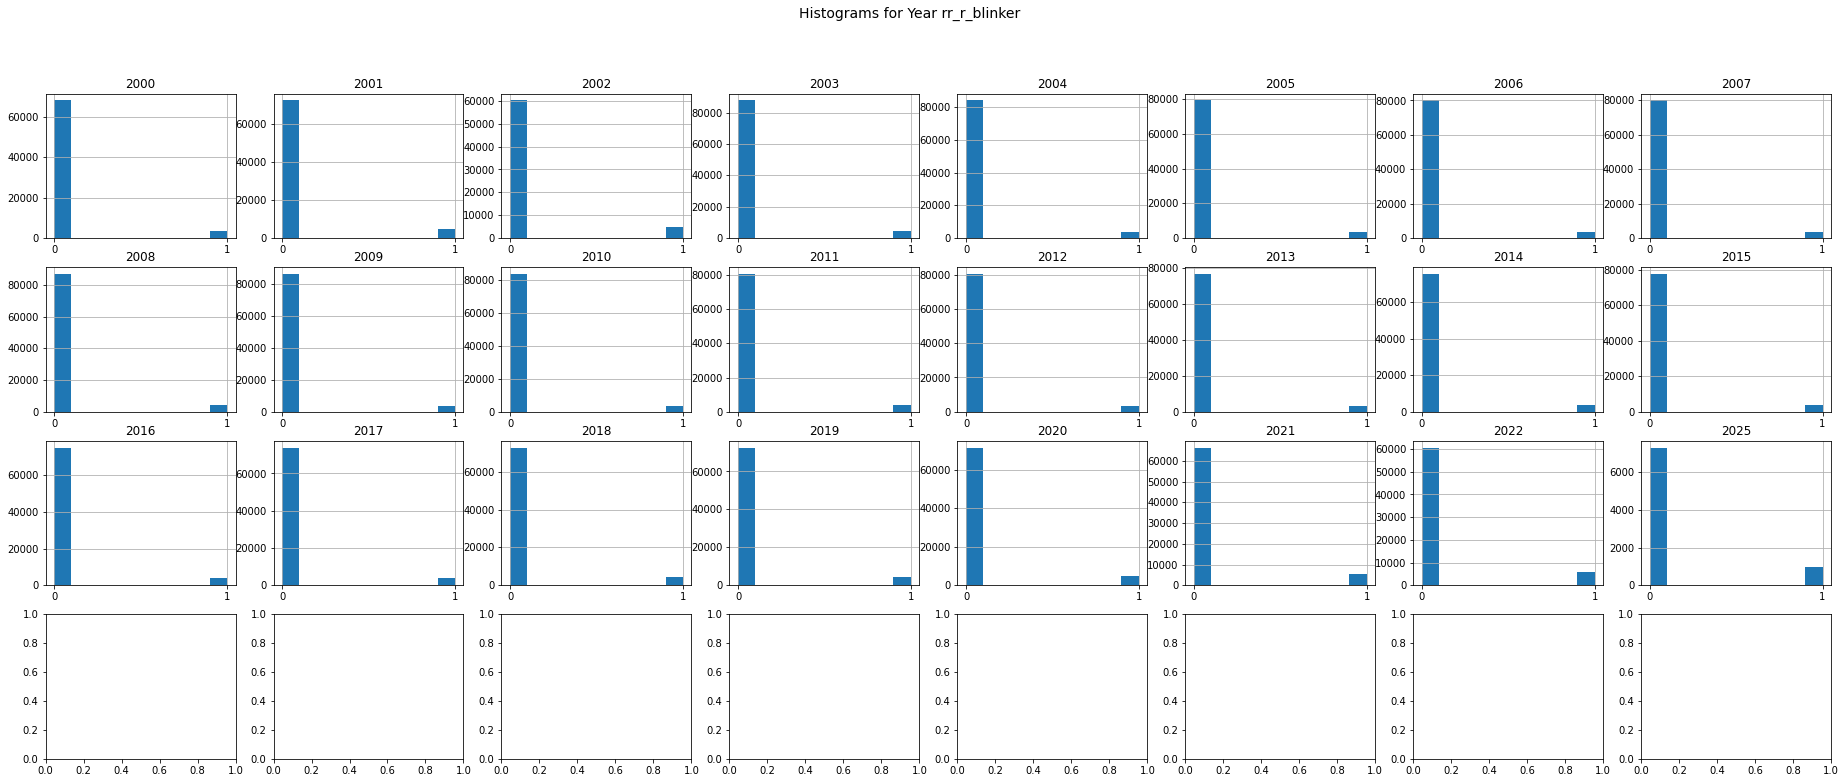

rr_r_j_mark


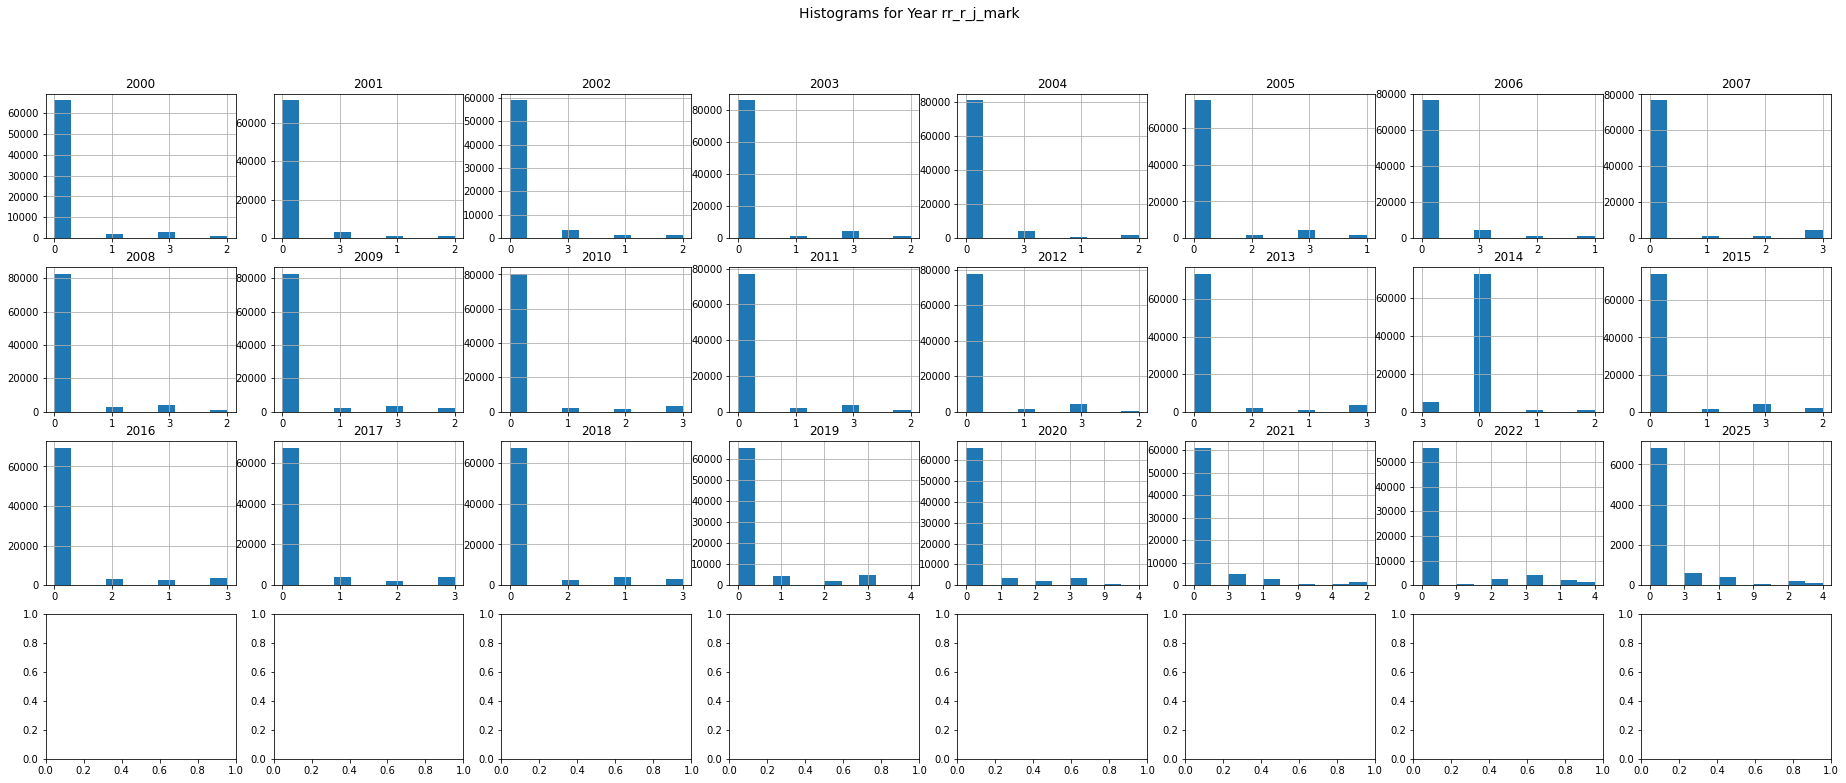

rr_r_age


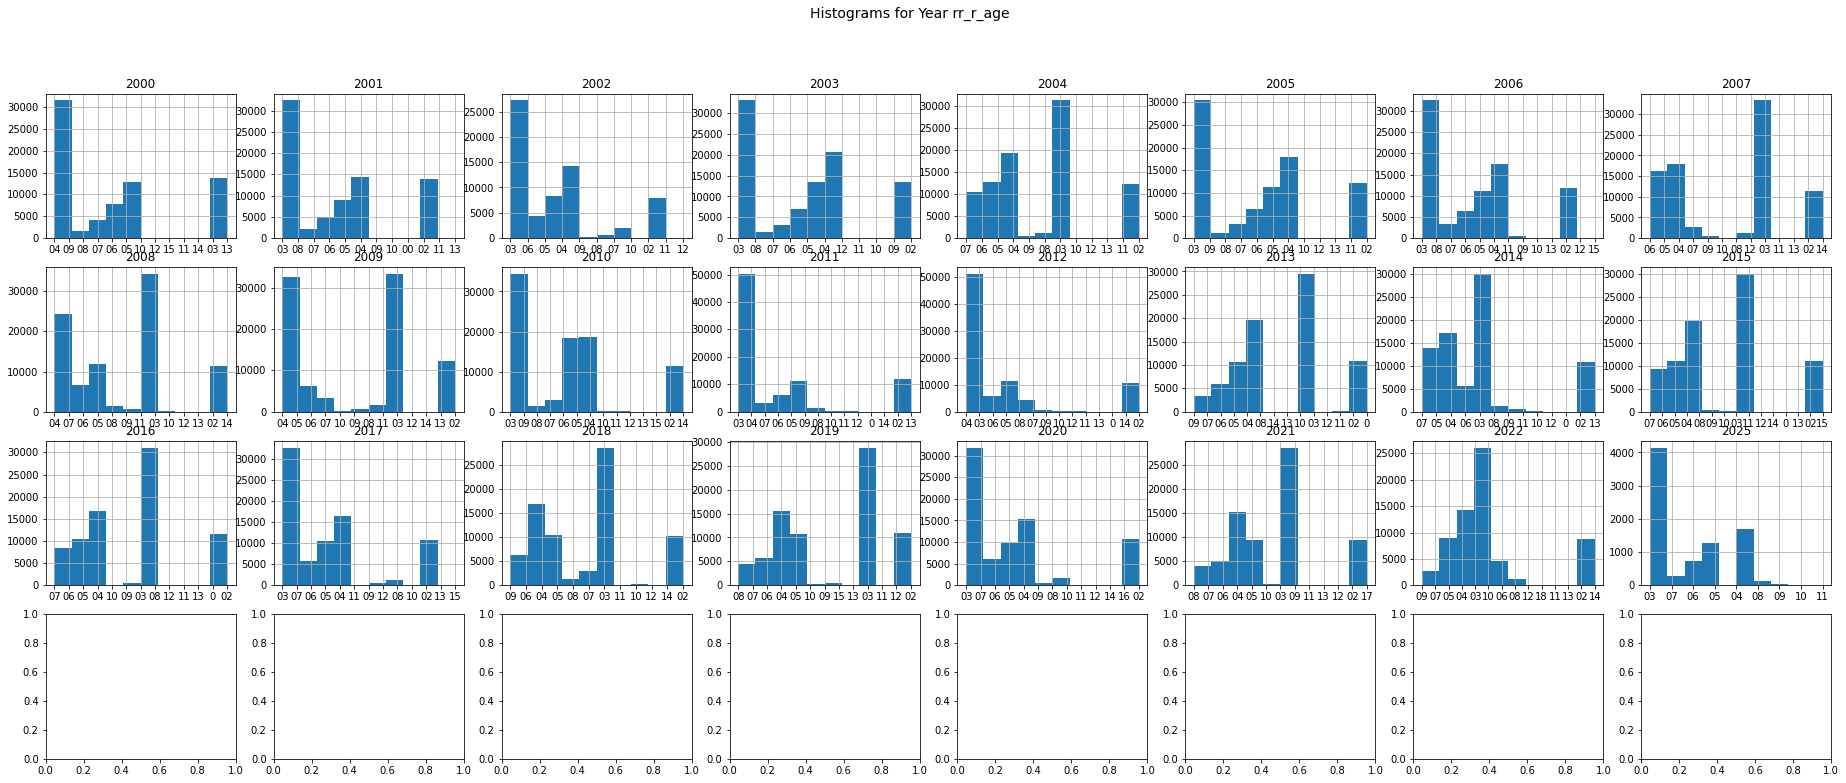

rr_r_gender


In [ ]:
dict_results = k_a_util.pivot_statistics_by_column2(dict_statistics)

k_a_util.plot_histograms(dict_results, rows=4, cols=8, dpi=72)